In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats import chi2

%matplotlib inline

## Moving Average(MA) model

***AR models are not that good at handling unexpected shocks in data, as they predict the current value using the previous values. Moving Average(MA) models take into account the residuals(errors) to predict the current value, so it is able to handle unexpected shocks more quickly.***

$$X(t) = \alpha + \theta_1 \cdot Er(t - 1) + Er(t)$$

* *Another difference between AR and MA is that to determine maximum number of lags in case of AR model, we relied on PACF plot, whereas in case of MA models, we rely on ACF plots. The reason is that since MA models aren't dependent on previous values, determining which lagged values have a significant effect on current value becomes irrelevant.*

In [2]:
actual_data = pd.read_csv("../../datasets/stock_prices/index_2018.csv")
df = actual_data.copy()
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df_index = df["date"]
df.drop("date", axis=1, inplace=True)
df.index = df_index
df.index.name = None

df = df.asfreq("b")

df.apply(lambda x: x.fillna(method="ffill"))

df_spx = pd.DataFrame(df["spx"])
df_ftse = pd.DataFrame(df["ftse"])

df_ftse["returns"] = df_ftse["ftse"].pct_change(1)

In [4]:
def LLR_test(model1, model2, df=1):
    """
        model1 -> First model
        model2 -> Second model
        df -> Degrees of freedom(default 1 as we are generally comparing models of only one order difference)
    """
    L1 = model1.fit().llf
    L2 = model2.fit().llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, df).round(4)
    return p

## MA(P, Q)

* ***P:*** *The AR model component.*
* ***Q:*** *The MA model component.*

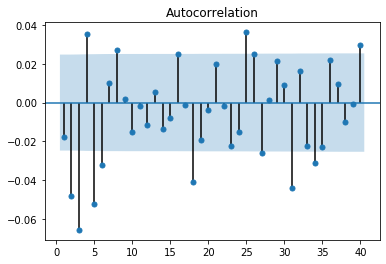

In [5]:
sgt.plot_acf(df_ftse["returns"][1:], lags=40, zero=False)
plt.show()

In [6]:
# Order -> (P, Q)
model_ret_ma_1 = ARMA(df_ftse["returns"][1:], order=(0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()
print(results_ret_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood               19304.450
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38602.901
Time:                        09:55:16   BIC                         -38582.667
Sample:                    01-10-1994   HQIC                        -38595.890
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.374      0.169   -8.09e-05       0.000
ma.L1.returns    -0.0196      0.013     -1.467      0.142      -0.046       0.007
                                    Root

***You don't need to check the p-value for the coefficient from this summary, refer to the ACF plot and cross-check it.***

In [7]:
model_ret_ma_2 = ARMA(df_ftse["returns"][1:], order=(0, 2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 1)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 2))))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 2)   Log Likelihood               19312.209
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38616.419
Time:                        09:55:16   BIC                         -38589.441
Sample:                    01-10-1994   HQIC                        -38607.071
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.457      0.145   -6.55e-05       0.000
ma.L1.returns    -0.0254      0.013     -2.000      0.046      -0.050      -0.001
ma.L2.returns    -0.0488      0.012     

In [9]:
model_ret_ma_3 = ARMA(df_ftse["returns"][1:], order=(0, 3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 2)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 3))))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 3)   Log Likelihood               19328.554
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38647.109
Time:                        09:57:01   BIC                         -38613.386
Sample:                    01-10-1994   HQIC                        -38635.424
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.587      0.113   -4.47e-05       0.000
ma.L1.returns    -0.0175      0.013     -1.380      0.168      -0.042       0.007
ma.L2.returns    -0.0539      0.012     

In [10]:
model_ret_ma_4 = ARMA(df_ftse["returns"][1:], order=(0, 4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 3)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 4))))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 4)   Log Likelihood               19331.628
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38651.256
Time:                        09:57:03   BIC                         -38610.789
Sample:                    01-10-1994   HQIC                        -38637.235
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.532      0.125    -5.3e-05       0.000
ma.L1.returns    -0.0169      0.013     -1.341      0.180      -0.042       0.008
ma.L2.returns    -0.0540      0.013     

In [11]:
model_ret_ma_5 = ARMA(df_ftse["returns"][1:], order=(0, 5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 4)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 5))))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 5)   Log Likelihood               19339.398
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38664.796
Time:                        09:57:05   BIC                         -38617.585
Sample:                    01-10-1994   HQIC                        -38648.438
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.617      0.106   -4.04e-05       0.000
ma.L1.returns    -0.0214      0.013     -1.691      0.091      -0.046       0.003
ma.L2.returns    -0.0494      0.013     

In [12]:
model_ret_ma_6 = ARMA(df_ftse["returns"][1:], order=(0, 6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 5)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 6))))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 6)   Log Likelihood               19342.158
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38668.317
Time:                        09:57:09   BIC                         -38614.361
Sample:                    01-10-1994   HQIC                        -38649.622
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.668      0.095   -3.33e-05       0.000
ma.L1.returns    -0.0194      0.013     -1.542      0.123      -0.044       0.005
ma.L2.returns    -0.0487      0.013     

In [13]:
model_ret_ma_7 = ARMA(df_ftse["returns"][1:], order=(0, 7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 6)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 7))))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 7)   Log Likelihood               19342.333
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38666.667
Time:                        09:57:13   BIC                         -38605.966
Sample:                    01-10-1994   HQIC                        -38645.635
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.655      0.098   -3.51e-05       0.000
ma.L1.returns    -0.0201      0.013     -1.586      0.113      -0.045       0.005
ma.L2.returns    -0.0490      0.013     

***Hence, we stop at MA(6). But the ACF plot suggested that 8th lag was significant.***

In [14]:
model_ret_ma_8 = ARMA(df_ftse["returns"][1:], order=(0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 7)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 8))))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               19344.437
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 15 Mar 2020   AIC                         -38668.873
Time:                        09:57:17   BIC                         -38601.428
Sample:                    01-10-1994   HQIC                        -38645.505
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.609      0.108   -4.15e-05       0.000
ma.L1.returns    -0.0197      0.013     -1.563      0.118      -0.044       0.005
ma.L2.returns    -0.0491      0.013     

In [15]:
print("LLR Test p-value: ", LLR_test(ARMA(df_ftse["returns"][1:], order=(0, 6)), 
                                     ARMA(df_ftse["returns"][1:], order=(0, 8)), df=2))

LLR Test p-value:  0.1025


***Hence, we choose MA(6).***

## Residuals for returns

In [16]:
df_ftse["res_ret_ma_8"] = results_ret_ma_8.resid[1:]

In [17]:
sts.adfuller(df_ftse["res_ret_ma_8"][2:])

(-79.20663510752233,
 0.0,
 0,
 6274,
 {'1%': -3.4313927123850956,
  '5%': -2.8620007867175294,
  '10%': -2.5670152737839897},
 -38448.42134924977)

***Hence, the error term is indeed white noise, as it is stationary.***

## Normalized returns

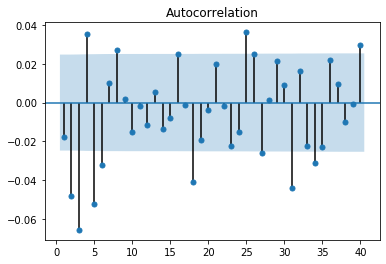

In [18]:
bench_ret = df_ftse["returns"].iloc[1]
df_ftse["norm_ret"] = (df_ftse["returns"] / bench_ret) * 100

sgt.plot_acf(df_ftse["norm_ret"][1:], lags=40, zero=False)
plt.show()

***Use normalized returns column and build a MA model using that. Then compare performances. Also, check for the ACF plots for the residuals of the series, as they should be stationary(white noise).***